In [2]:
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d nicapotato/womens-ecommerce-clothing-reviews

womens-ecommerce-clothing-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip /content/womens-ecommerce-clothing-reviews.zip -d /content/womens-ecommerce-clothing-reviews/


Archive:  /content/womens-ecommerce-clothing-reviews.zip
replace /content/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv  


# Import Data & Libraries


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/content/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# Preprocessing Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [8]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
df = df.drop(['Unnamed: 0', 'Title', 'Clothing ID', 'Review Text'], axis = 1)

In [10]:
df = df.dropna()

In [11]:
df.isna().sum()

Age                        0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

# Exploration Data

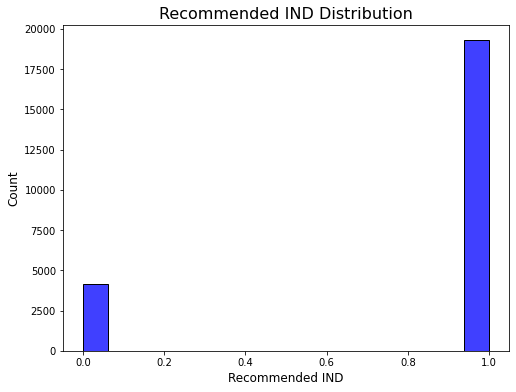

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=df, x='Recommended IND', ax=ax, color='blue', kde=False)

ax.set_title('Recommended IND Distribution', fontsize=16)
ax.set_xlabel('Recommended IND', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='both', labelsize=10)
plt.show()

## One-hot encoding

In [13]:
df_encoded = pd.get_dummies(df, columns=['Division Name', 'Department Name', 'Class Name'])
df_encoded.shape

(23472, 33)

In [14]:
# Divide the data into 2 variables X and Y
X = df_encoded.drop(['Recommended IND'], axis = 1)
Y = df_encoded['Recommended IND']

In [15]:
# Create training data and testing data from a dataset with test data = 30%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

# Modeling

In [19]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# make predictions on test data
prediction = logreg.predict(X_test)
accuracies = accuracy_score(y_test, prediction)

In [17]:
# Create visualization of Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                         normalize = False,
                         title = None,
                         cmap= plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    """
    if not title :
        if normalize :
            title = 'Normalized confusion matrix'
        else :
            title = 'Confusion matrix, without normalization'
            
    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation = 'nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
          yticks=np.arange(cm.shape[0]),
          title=title,
          ylabel= 'True label',
          xlabel = 'Predicted label')
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i,j], fmt),
                   ha ="center", va="center",
                   color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[ 676  104]
 [ 215 3700]]
Normalized confusion matrix
[[0.87 0.13]
 [0.05 0.95]]


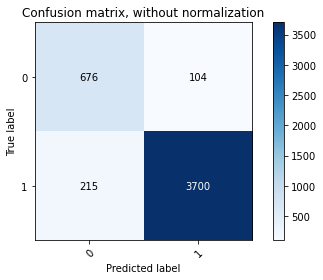

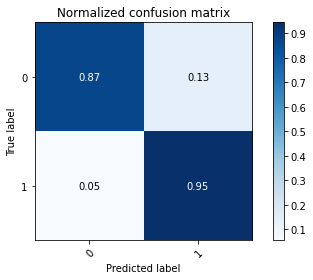

In [18]:
# Result Visualisation
class_names = Y
np.set_printoptions(precision=2)

plot_confusion_matrix(y_test, prediction, classes=class_names,
                     title= 'Confusion matrix, without normalization')

plot_confusion_matrix(y_test, prediction, classes=class_names, normalize= True,
                      title='Normalized confusion matrix')

plt.show()

In [20]:
# evaluate model performance
print(classification_report(y_test, prediction))
print(accuracies)

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       780
           1       0.97      0.95      0.96      3915

    accuracy                           0.93      4695
   macro avg       0.87      0.91      0.88      4695
weighted avg       0.94      0.93      0.93      4695

0.9320553780617679
